In [1]:
EDA - 1 (BIKE DETAILS DATASET)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("BIKE DETAILS.csv")

In [6]:
#Q1.What is the range of selling prices in the dataset?
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"The range of selling prices is from ₹{min_price} to ₹{max_price}")


The range of selling prices is from ₹5000 to ₹760000


In [11]:
#Q2. What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
print(f"The median selling price for bikes is ₹{median_price}")

The median selling price for bikes is ₹45000.0


In [12]:
#Q3. What is the most common seller type?
most_common_seller = df['seller_type'].mode()[0]

print(f"The most common seller type is: {most_common_seller}")

The most common seller type is: Individual


In [13]:
#Q4. How many bikes have driven more than 50,000 kilometers?
high_km_bikes = df[df['km_driven'] > 50000]
count_high_km = len(high_km_bikes)

print(f"Number of bikes that have driven more than 50,000 km: {count_high_km}")

Number of bikes that have driven more than 50,000 km: 170


In [14]:
#Q5. What is the average km_driven value for each ownership type?
average_km_by_owner = df.groupby('owner')['km_driven'].mean()

print("Average km_driven for each ownership type:\n")
print(average_km_by_owner)

Average km_driven for each ownership type:

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [15]:
#Q6. What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df[df['year'] <= 2015]

proportion = len(bikes_2015_or_older) / len(df)

print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


In [16]:
#Q7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

print("Missing values in the dataset:\n")
print(missing_values)

Missing values in the dataset:

ex_showroom_price    435
dtype: int64


In [17]:
#Q8. What is the highest ex_showroom_price recorded, and for which bike?
df_non_null = df.dropna(subset=['ex_showroom_price'])

# Find the row with the maximum ex_showroom_price
max_price_row = df_non_null[df_non_null['ex_showroom_price'] == df_non_null['ex_showroom_price'].max()]

# Display the result
print("Bike with the highest ex-showroom price:\n")
print(max_price_row[['name', 'ex_showroom_price']])


Bike with the highest ex-showroom price:

                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [7]:
#Q9. What is the total number of bikes listed by each seller type?
seller_counts = df['seller_type'].value_counts()
seller_counts

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

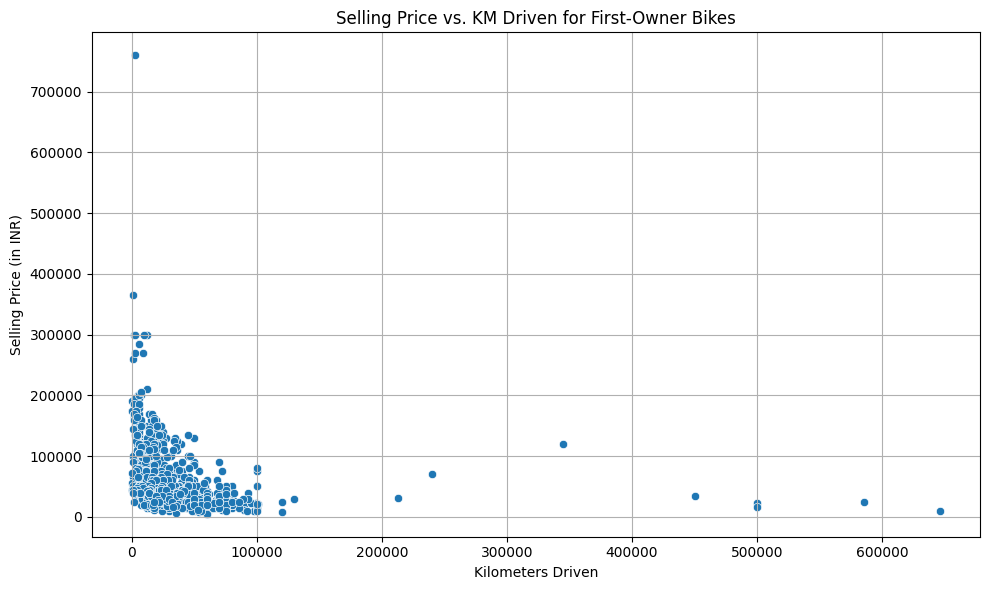

In [8]:
#Q10. What is the relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'].str.lower().str.contains("1st owner", na=False)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title("Selling Price vs. KM Driven for First-Owner Bikes")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (in INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
#Q11. Identify and remove outliers in the km_driven column using the IQR method?
def remove_outliers_km_driven(df):
    """Removes outliers from the km_driven column using the IQR method."""
    Q1 = df['km_driven'].quantile(0.25)
    Q3 = df['km_driven'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

df_no_outliers = remove_outliers_km_driven(df)
print(f"\n Original DataFrame Shape: {df.shape},\n DataFrame Shape After Removing Outliers: {df_no_outliers.shape}")


 Original DataFrame Shape: (1061, 7),
 DataFrame Shape After Removing Outliers: (1022, 7)


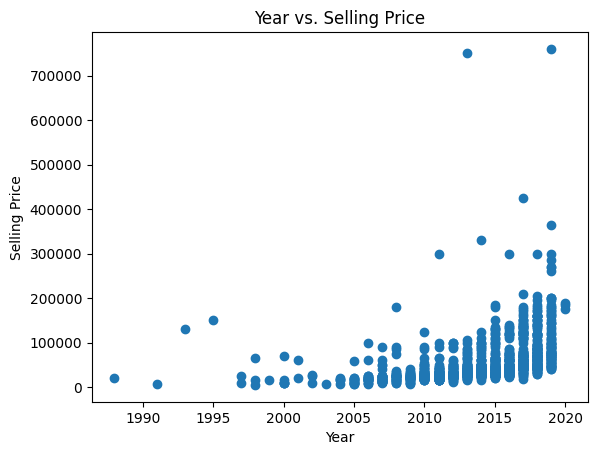

In [17]:
#Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price
def visualize_year_vs_selling_price(df):
    plt.scatter(df['year'], df['selling_price'])
    plt.xlabel("Year")
    plt.ylabel("Selling Price")
    plt.title("Year vs. Selling Price")
    plt.show()

visualize_year_vs_selling_price(df)

In [19]:
#Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
def average_depreciation(df):
    current_year = datetime.datetime.now().year
    df['bike_age'] = current_year - df['year']

    if 'ex_showroom_price' not in df.columns:
        print("Error: 'ex_showroom_price' column not found.")
        return None

    df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
    return df['depreciation'].mean()

import datetime
avg_depreciation = average_depreciation(df.copy()) # Important to use .copy() here!
print(f"\n Average Depreciation: {avg_depreciation:.2f}")


 Average Depreciation: 28513.55


In [21]:
#Q14. Which bike names are priced significantly above the average price for their manufacturing year?
def bikes_priced_above_average(df):

    if 'year' not in df.columns or 'selling_price' not in df.columns or 'name' not in df.columns:
        print("Error: Required columns ('year', 'selling_price', or 'name') not found.")
        return None

    average_prices_by_year = df.groupby('year')['selling_price'].transform('mean')  # Use transform
    df['year_avg_price'] = average_prices_by_year
    df['price_ratio'] = df['selling_price'] / df['year_avg_price']

    above_average_bikes = df[df['price_ratio'] > 1.5][['name', 'year', 'selling_price', 'year_avg_price', 'price_ratio']]
    return above_average_bikes

above_avg_bikes = bikes_priced_above_average(df)
print("\n Bikes Priced Significantly Above Average for Their Year:\n", above_avg_bikes)



 Bikes Priced Significantly Above Average for Their Year:
                                      name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     year_avg_price  price_ratio  
2      87660.374046     1.711149  
7      34289.285714     5.249453  
13    119689.511628     3.049557  
18     

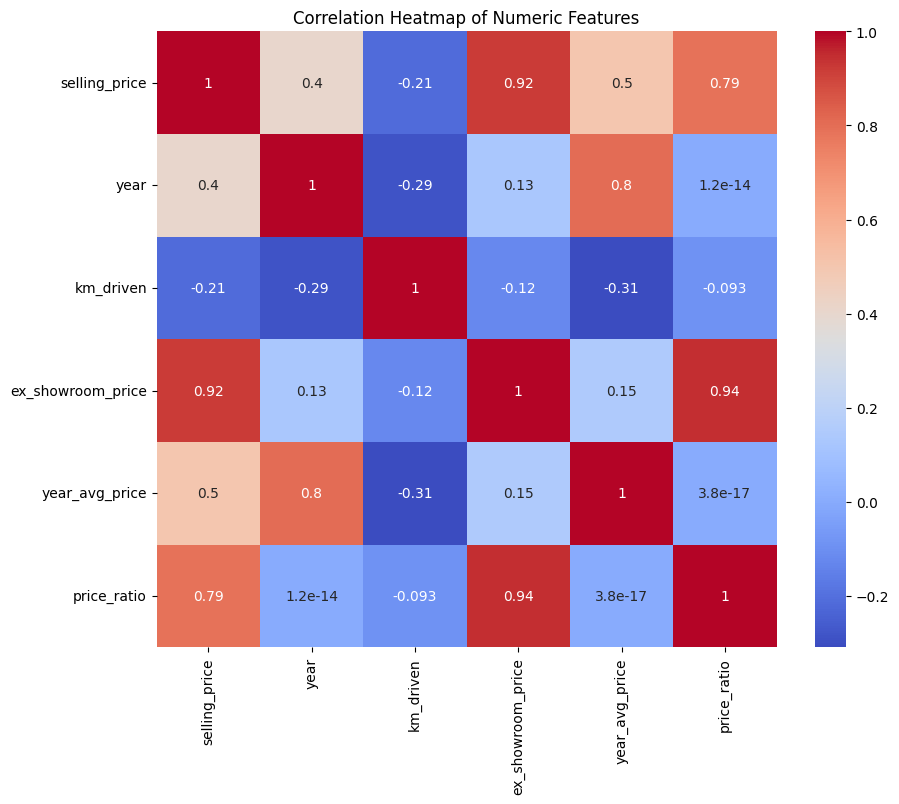

In [22]:
#Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
def correlation_heatmap(df):
    numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()

correlation_heatmap(df)

In [ ]:
EDA - 2 ( Car Sale Dataset)

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Car Sale.csv")


 Average Selling Price by Dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
Pitre Buick-Pontiac-Gmc of Scottsdale              27404.248408
Chrysler Plymouth                                  27555.526400
McKinney Dodge Chrysler Jeep                       27684.096979
Clay Johnson Auto Sales                            27816.027113
Nebo Chevrolet                                     27818.889415
Hatfield Volkswagen                                27853.712242
New Castle Ford Lincoln Mercury                    27867.131955
Progressive Shippers Cooperative Association No    27884.264036
Ryder Truck Rental and Leasing                     27914.988782
Motor Vehicle Branch Office                        27956.739617
Diehl Motor CO Inc                                 27993.929487
Pars Auto Sales                                    28013.060317
Tri-State Mack Inc                                 28095.562050
C & M Motors Inc                                   28111

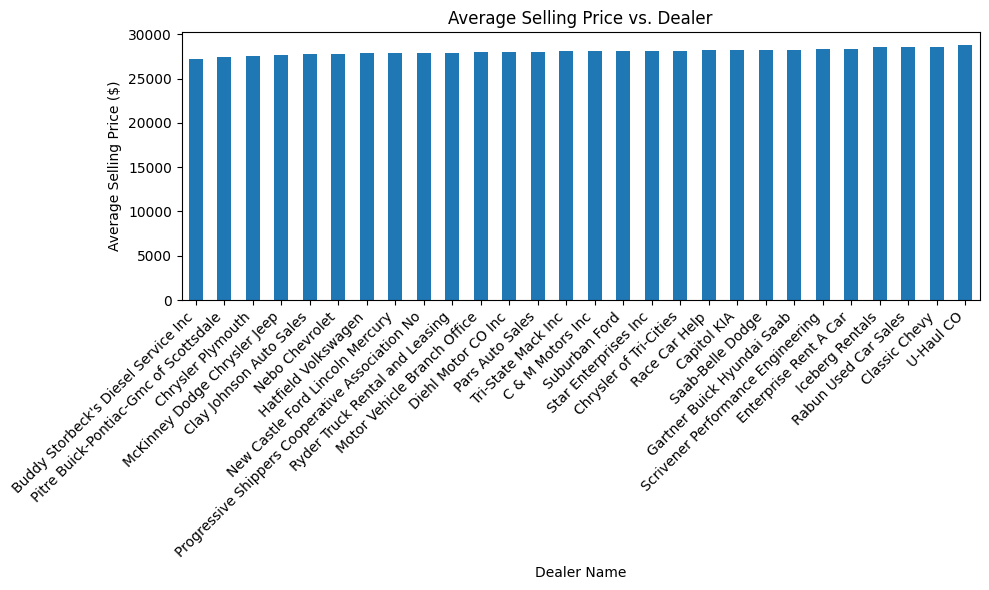

In [25]:
#Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
def avg_selling_price_by_dealer(df):

    if 'Dealer_Name' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Dealer_Name' or 'Price ($)' column not found.")
        return None

    avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values()
    print("\n Average Selling Price by Dealer:\n", avg_price_by_dealer)

    plt.figure(figsize=(10, 6))
    avg_price_by_dealer.plot(kind='bar')
    plt.xlabel("Dealer Name")
    plt.ylabel("Average Selling Price ($)")
    plt.title("Average Selling Price vs. Dealer")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

avg_selling_price_by_dealer(df.copy())


 Price Variation by Company:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


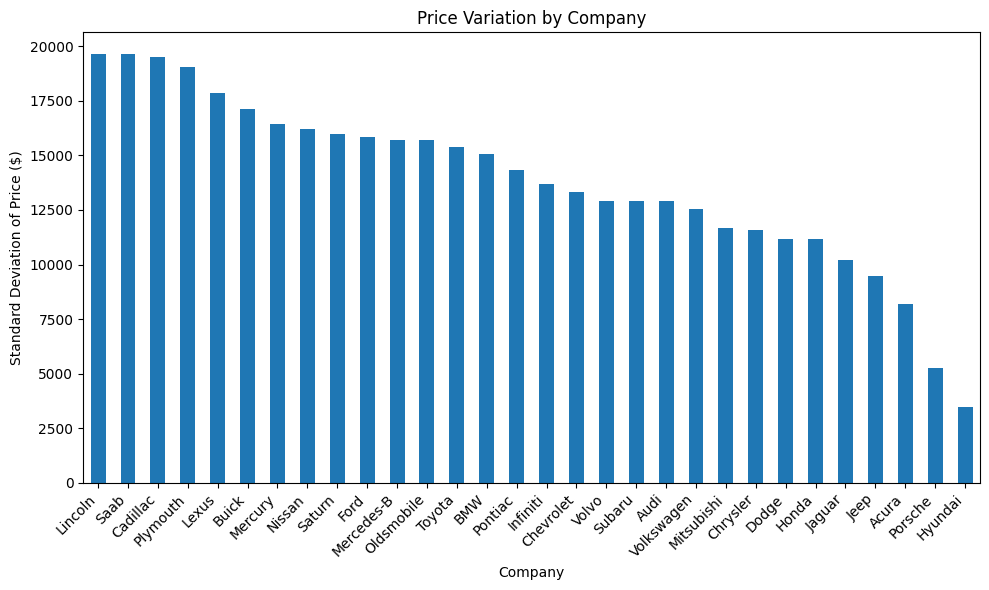

In [27]:
#Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
def price_variation_by_company(df):

    if 'Company' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Company' or 'Price ($)' column not found.")
        return None

    price_std_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
    print("\n Price Variation by Company:\n", price_std_by_company)

    plt.figure(figsize=(10, 6))
    price_std_by_company.plot(kind='bar')
    plt.xlabel("Company")
    plt.ylabel("Standard Deviation of Price ($)")
    plt.title("Price Variation by Company")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

price_variation_by_company(df.copy())

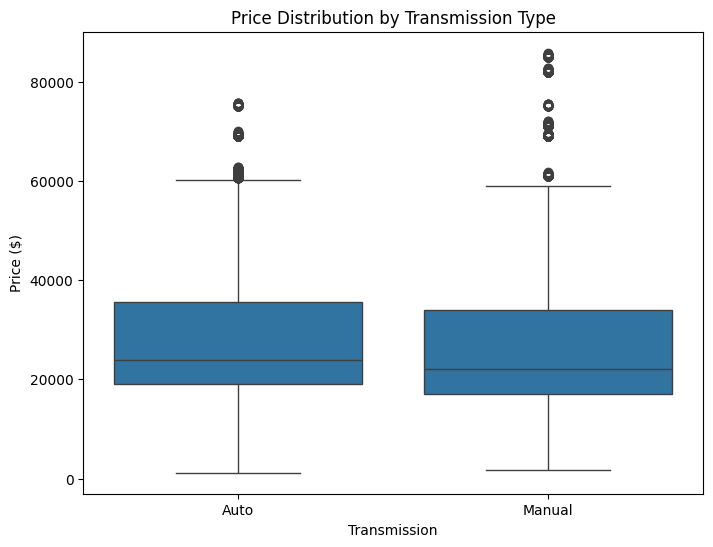


 Price Distribution by Transmission Type:
                  25%      50%      75%
Transmission                           
Auto          19000.0  24000.0  35500.0
Manual        17000.0  22001.0  34000.0


In [29]:
#Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
def price_distribution_by_transmission(df):

    if 'Transmission' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Transmission' or 'Price ($)' column not found.")
        return None

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Transmission', y='Price ($)', data=df)
    plt.title("Price Distribution by Transmission Type")
    plt.show()

    # Additional: IQR comparison (can be printed)
    print("\n Price Distribution by Transmission Type:")
    print(df.groupby('Transmission')['Price ($)'].describe().loc[:, ['25%', '50%', '75%']])

price_distribution_by_transmission(df.copy())

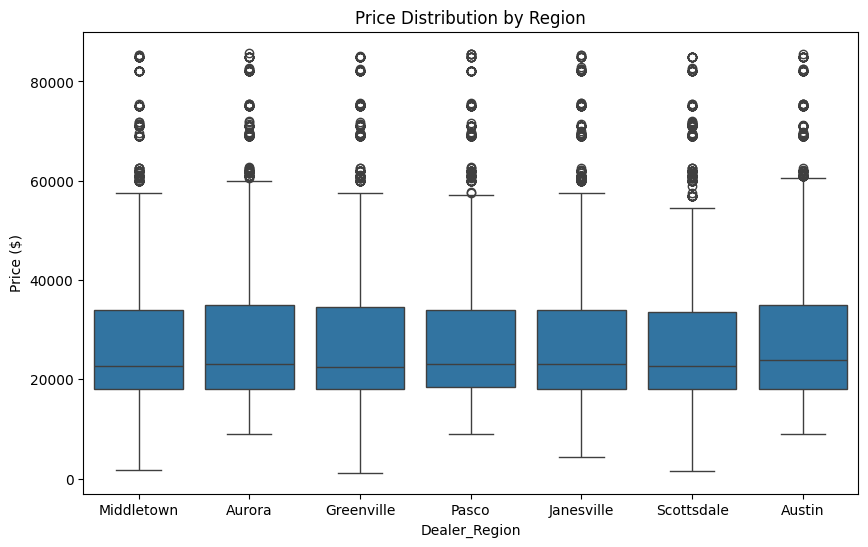

In [30]:
#Q4. What is the distribution of car prices across different regions
def price_distribution_by_region(df):

    if 'Dealer_Region' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Dealer_Region' or 'Price ($)' column not found.")
        return None

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
    plt.title("Price Distribution by Region")
    plt.show()

price_distribution_by_region(df.copy())

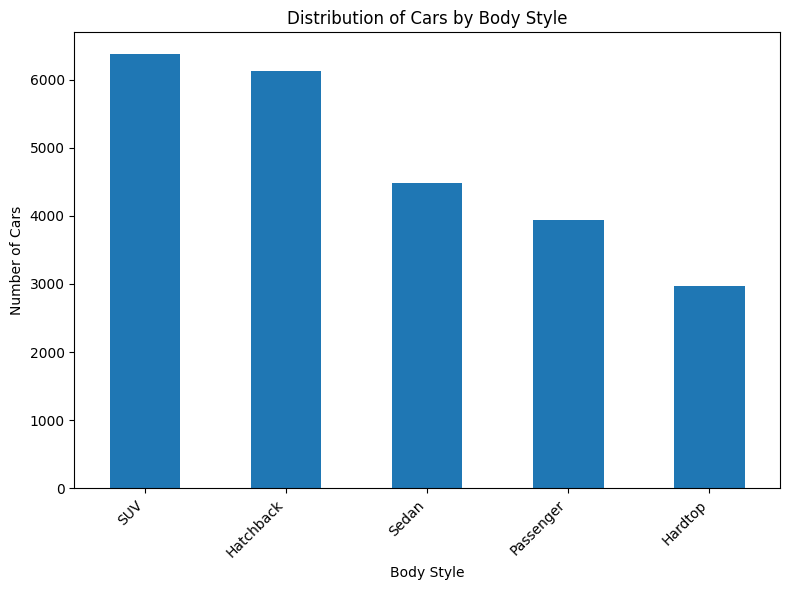

In [31]:
#Q5. What is the distribution of cars based on body styles?
def distribution_of_body_styles(df):

    if 'Body Style' not in df.columns:
        print("Error: 'Body Style' column not found.")
        return None

    plt.figure(figsize=(8, 6))
    df['Body Style'].value_counts().plot(kind='bar')
    plt.xlabel("Body Style")
    plt.ylabel("Number of Cars")
    plt.title("Distribution of Cars by Body Style")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

distribution_of_body_styles(df.copy())


 Average Price by Gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


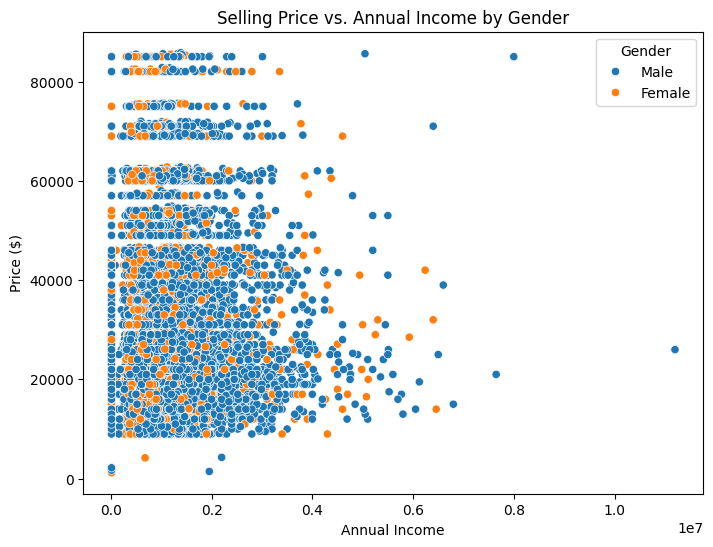

In [32]:
#Q6. How does the average selling price of cars vary by customer gender and annual income?
def avg_price_by_gender_income(df):

    if 'Gender' not in df.columns or 'Annual Income' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Gender', 'Annual Income', or 'Price ($)' column not found.")
        return None

    print("\n Average Price by Gender:\n", df.groupby('Gender')['Price ($)'].mean())

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df)
    plt.title("Selling Price vs. Annual Income by Gender")
    plt.show()

avg_price_by_gender_income(df.copy())

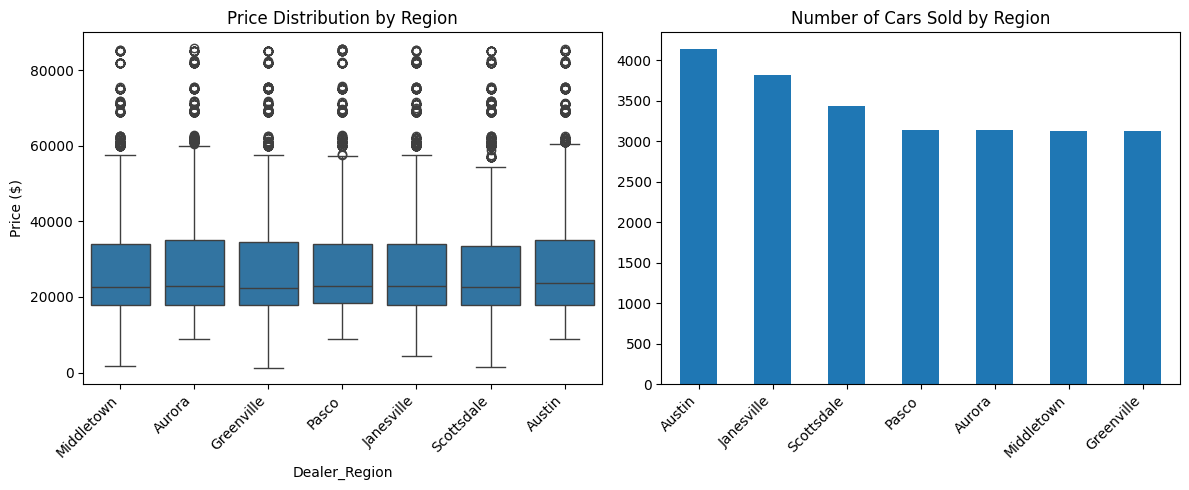

In [33]:
#Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region 
def price_and_sales_by_region(df):

    if 'Dealer_Region' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Dealer_Region' or 'Price ($)' column not found.")
        return None

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
    plt.title("Price Distribution by Region")
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    df['Dealer_Region'].value_counts().plot(kind='bar')
    plt.title("Number of Cars Sold by Region")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

price_and_sales_by_region(df.copy())


Average Price by Engine:
 Engine
Overhead Camshaft            27914.710631
DoubleÂ Overhead Camshaft    28248.525972
Name: Price ($), dtype: float64


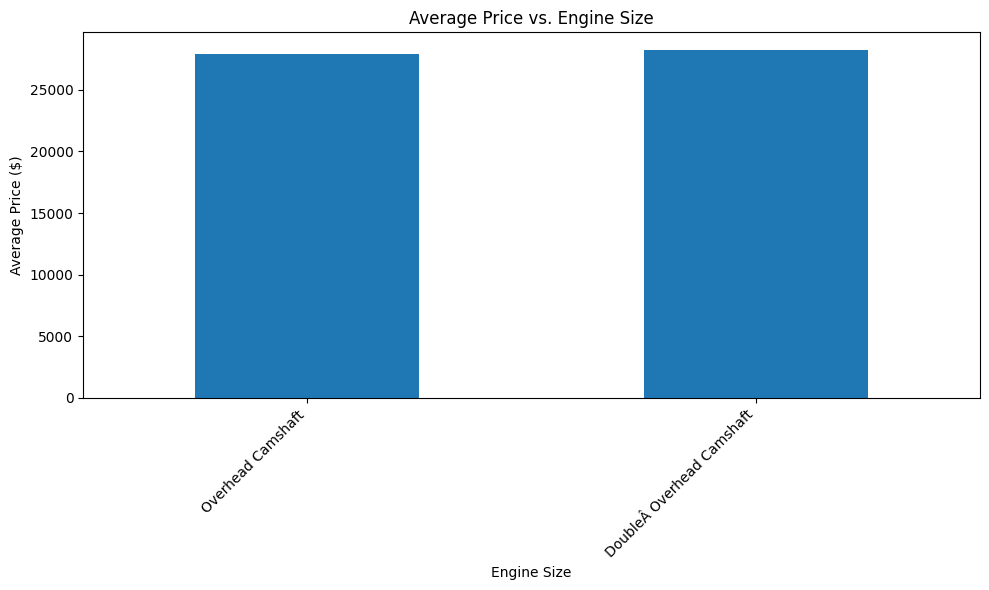

In [35]:
#Q8.  How does the average car price differ between cars with different engine sizes
def avg_price_by_engine(df):

    if 'Engine' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Engine' or 'Price ($)' column not found.")
        return None

    avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values()
    print("\nAverage Price by Engine:\n", avg_price_by_engine)

    plt.figure(figsize=(10, 6))
    avg_price_by_engine.plot(kind='bar')
    plt.xlabel("Engine Size")
    plt.ylabel("Average Price ($)")
    plt.title("Average Price vs. Engine Size")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

avg_price_by_engine(df.copy())



Average Price by Income Bracket:
 Income Bracket
<50K        27884.297820
50-75K               NaN
75-100K     43000.000000
100-125K    33000.500000
125-150K    16666.666667
>150K       28149.089557
Name: Price ($), dtype: float64


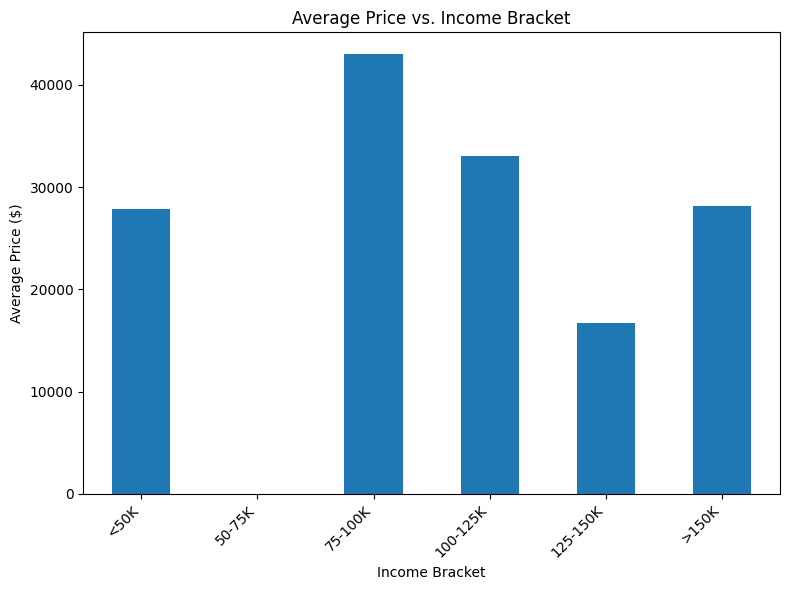

In [37]:
#Q9. How do car prices vary based on the customer’s annual income bracket
def price_variation_by_income_bracket(df):

    if 'Annual Income' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Annual Income' or 'Price ($)' column not found.")
        return None

    # Define income brackets (you might need to adjust these)
    bins = [0, 50000, 75000, 100000, 125000, 150000, np.inf]
    labels = ['<50K', '50-75K', '75-100K', '100-125K', '125-150K', '>150K']
    df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

    avg_price_by_bracket = df.groupby('Income Bracket')['Price ($)'].mean()
    print("\nAverage Price by Income Bracket:\n", avg_price_by_bracket)

    plt.figure(figsize=(8, 6))
    avg_price_by_bracket.plot(kind='bar')
    plt.xlabel("Income Bracket")
    plt.ylabel("Average Price ($)")
    plt.title("Average Price vs. Income Bracket")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

price_variation_by_income_bracket(df.copy())


Top 5 Car Models with Highest Sales:
 ['Diamante', 'Silhouette', 'Prizm', 'Passat', 'Ram Pickup']


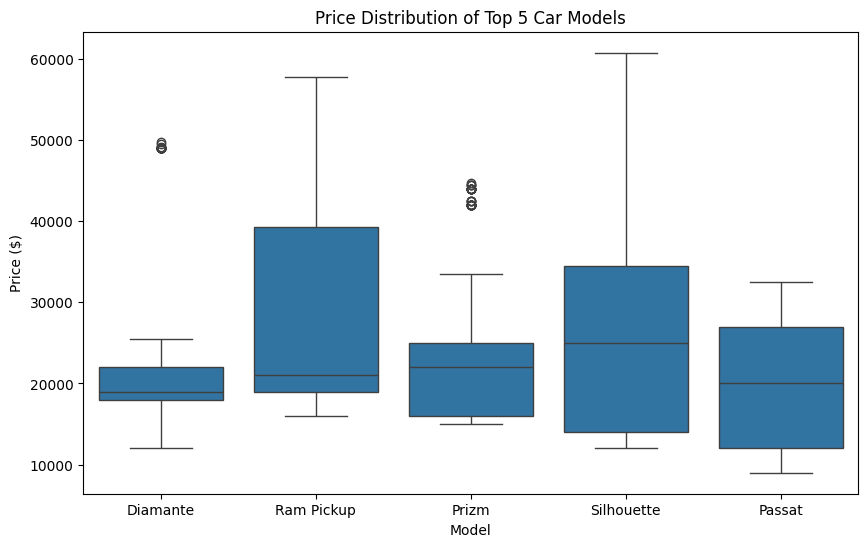

In [39]:
#Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look
def top_5_models_and_price_distribution(df):

    if 'Model' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Model' or 'Price ($)' column not found.")
        return None

    top_5_models = df['Model'].value_counts().head(5).index.tolist()
    print("\nTop 5 Car Models with Highest Sales:\n", top_5_models)

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_5_models)])
    plt.title("Price Distribution of Top 5 Car Models")
    plt.show()

top_5_models_and_price_distribution(df.copy())

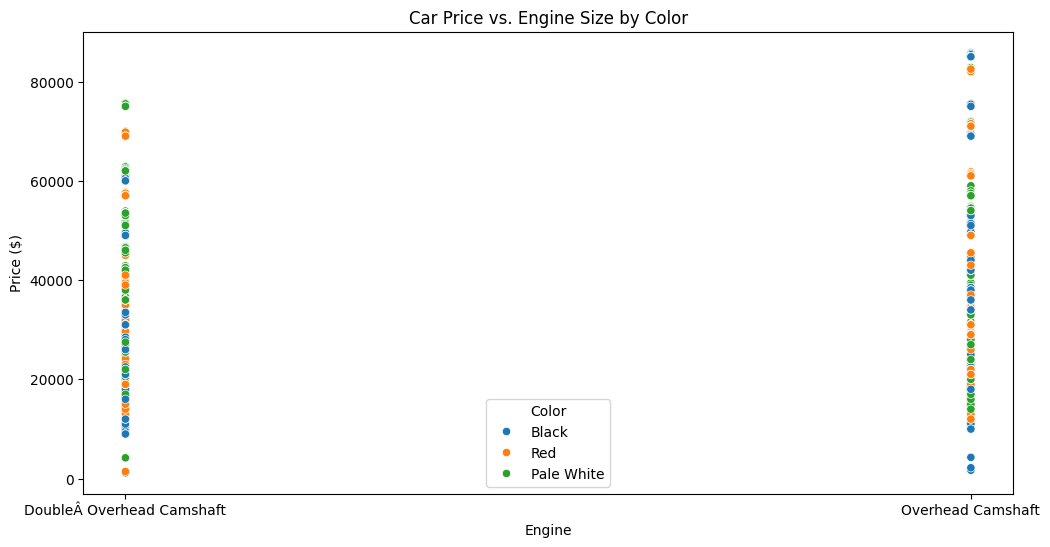


   Colors with Highest Price Variation:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [40]:
#Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation
def price_vs_engine_color(df):

    if 'Engine' not in df.columns or 'Color' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Engine', 'Color', or 'Price ($)' column not found.")
        return None

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df)
    plt.title("Car Price vs. Engine Size by Color")
    plt.show()

    color_price_std = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
    print("\n   Colors with Highest Price Variation:\n", color_price_std.head())

price_vs_engine_color(df.copy())


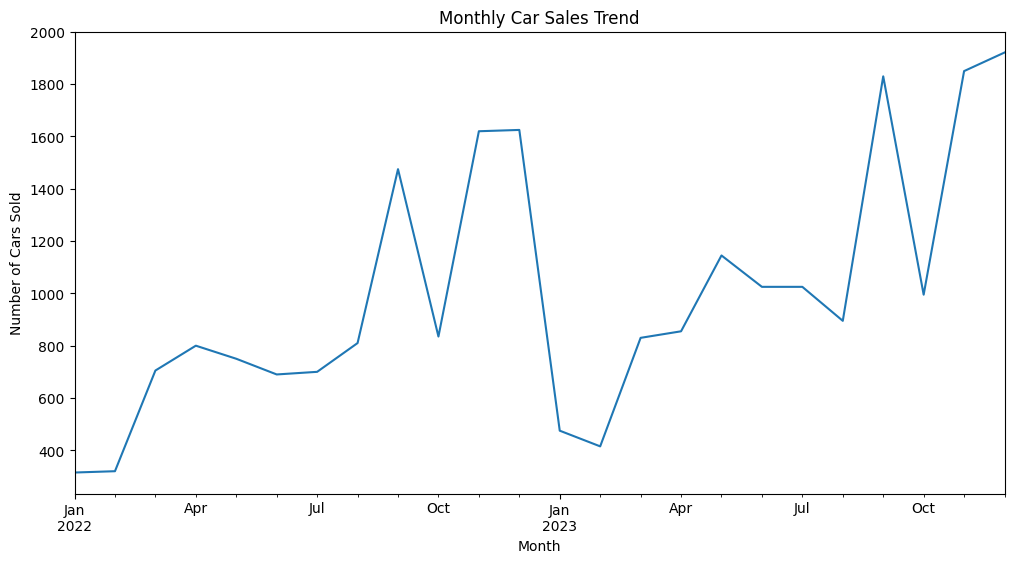

In [41]:
#Q12. Is there any seasonal trend in car sales based on the date of sale?
def seasonal_trend_car_sales(df):

    if 'Date' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Date' or 'Price ($)' column not found.")
        return None

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert 'Date' to datetime
    df.set_index('Date', inplace=True)
    monthly_sales = df.resample('M')['Price ($)'].count()

    plt.figure(figsize=(12, 6))
    monthly_sales.plot()
    plt.xlabel("Month")
    plt.ylabel("Number of Cars Sold")
    plt.title("Monthly Car Sales Trend")
    plt.show()

seasonal_trend_car_sales(df.copy())


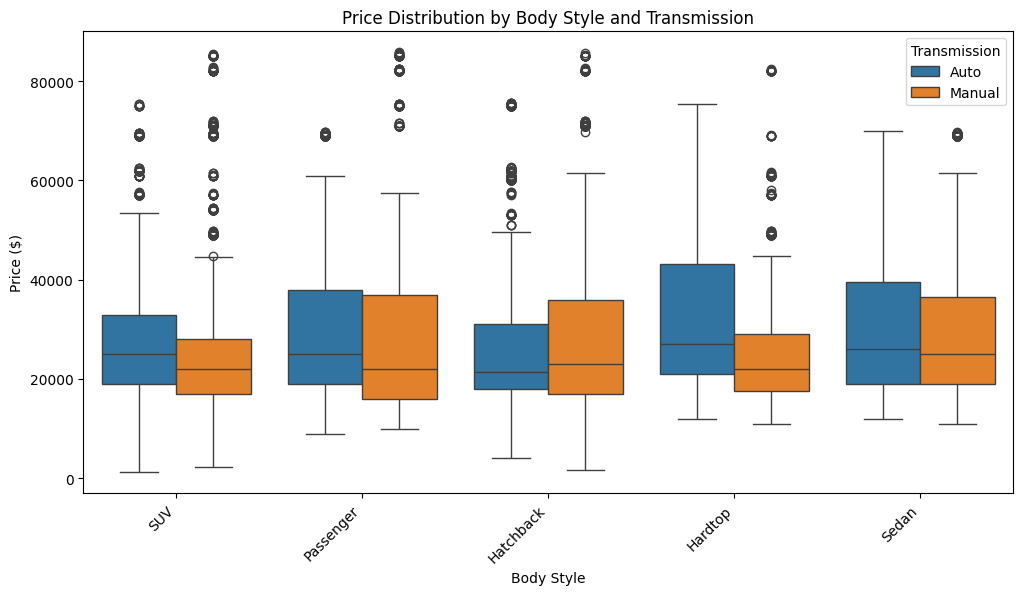

In [42]:
#Q13. How does the car price distribution change when considering different combinations of body style and transmission type
def price_distribution_body_style_transmission(df):

    if 'Body Style' not in df.columns or 'Transmission' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Body Style', 'Transmission', or 'Price ($)' column not found.")
        return None

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
    plt.title("Price Distribution by Body Style and Transmission")
    plt.xticks(rotation=45, ha='right')
    plt.show()

price_distribution_body_style_transmission(df.copy())


Correlation Matrix:
                Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


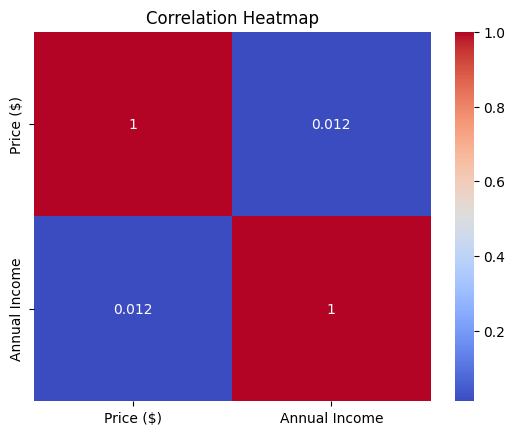

In [44]:
#Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
def correlation_analysis(df):

    if 'Price ($)' not in df.columns or 'Engine' not in df.columns or 'Annual Income' not in df.columns:
        print("Error: 'Price ($)', 'Engine', or 'Annual Income' column not found.")
        return None

    correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

correlation_analysis(df.copy())


15. Average Price by Model and Engine:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


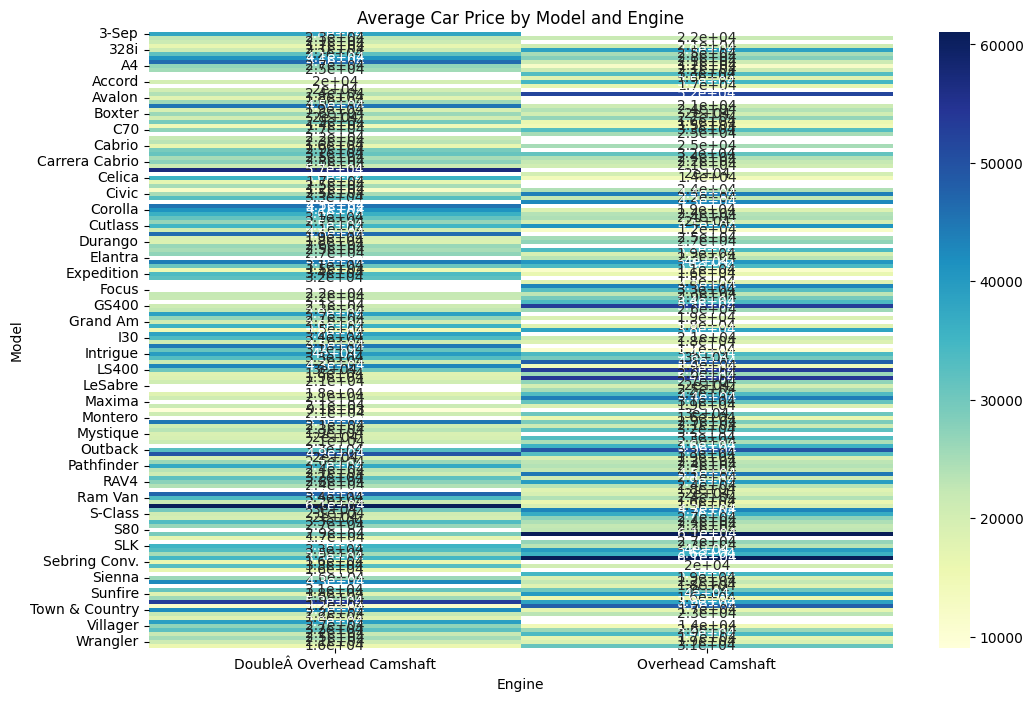

In [48]:
#Q15. How does the average car price vary across different car models and engine types?
def avg_price_by_model_engine(df):
    
    if 'Model' not in df.columns or 'Engine' not in df.columns or 'Price ($)' not in df.columns:
        print("Error: 'Model', 'Engine', or 'Price ($)' column not found.")
        return None

    avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
    print("\n15. Average Price by Model and Engine:\n", avg_price)

    plt.figure(figsize=(12, 8))
    sns.heatmap(avg_price, annot=True, cmap='YlGnBu')
    plt.title("Average Car Price by Model and Engine")
    plt.show()

avg_price_by_model_engine(df.copy())

In [ ]:
EDA - 3 ( Amazon Sales Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv("amazon.csv")  # Replace with your file path
except FileNotFoundError:
    print("Error: 'amazon_sales.csv' not found. Please provide the correct file path.")
    exit()

In [8]:
#Q1. What is the average rating for each product category
df = pd.read_csv("amazon.csv")  # Replace with actual file path
df.info()
df.isnull().sum()
df.dropna(inplace=True)  # or use fillna() depending on your context

df.duplicated().sum()
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [9]:
#Q2. What are the top 10 rating_count products by category?
top_rated_by_cat = df.sort_values(by='rating_count', ascending=False).groupby('category').first()
top_rated_by_cat[['product_name', 'rating_count']]



,product_name,rating_count
category,,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens","Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",Parker Classic Gold Gold Trim Ball Pen,"5,719"


Text(0, 0.5, 'Discounted Price')

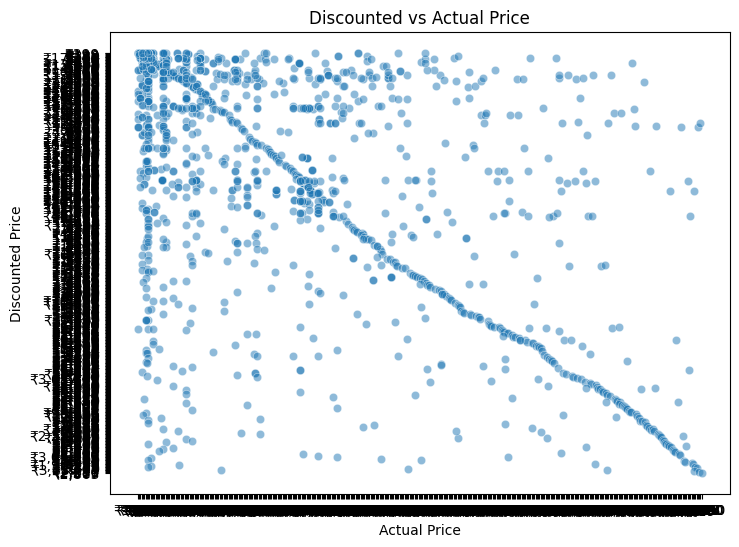

In [10]:
#Q3. What is the distribution of discounted prices vs. actual prices
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', alpha=0.5)
plt.title("Discounted vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")



 Average discount percentage by category
category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerA

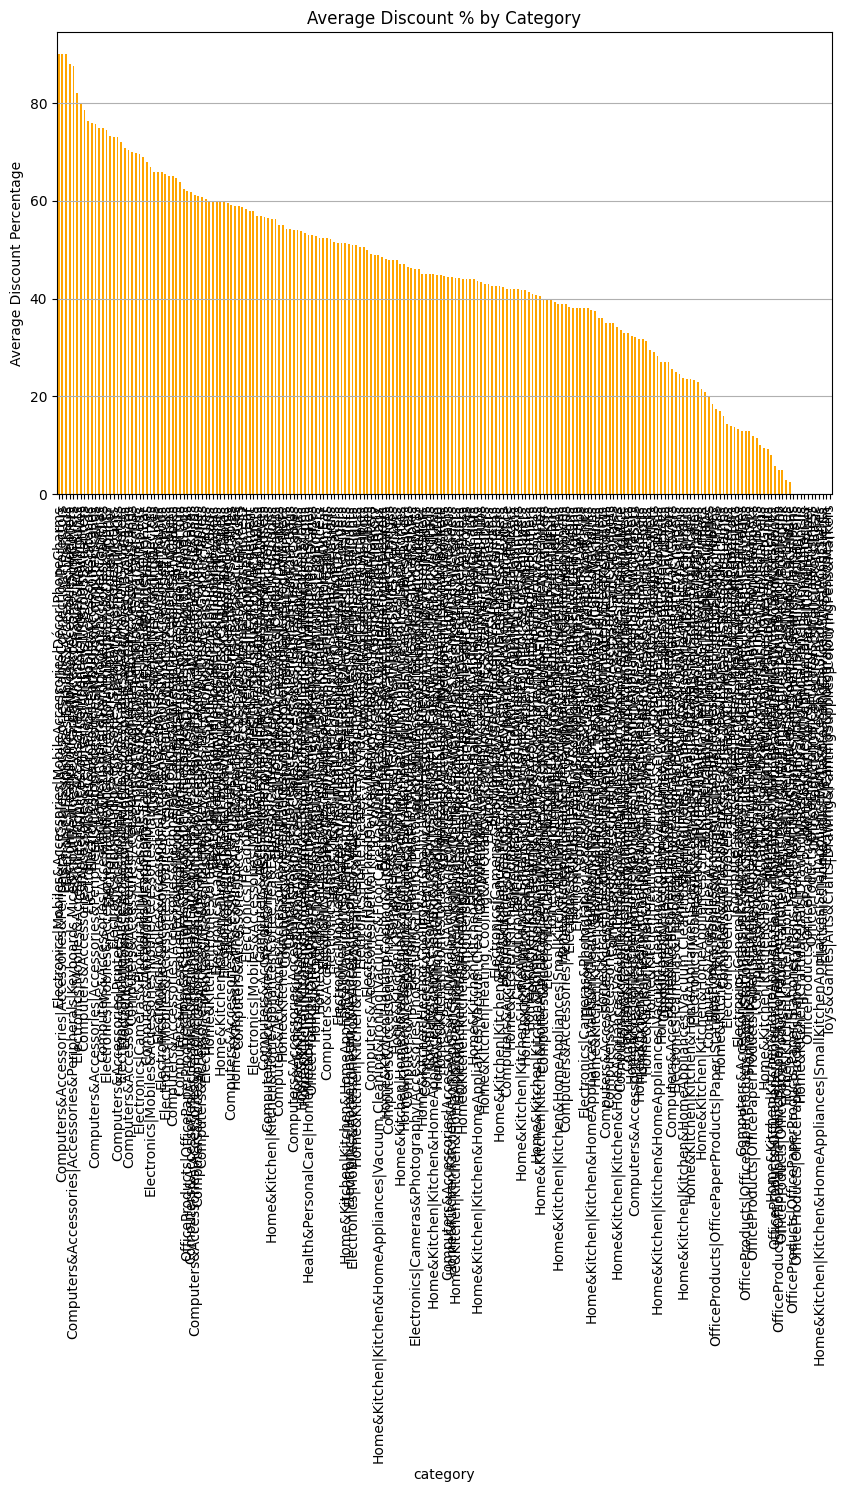

In [27]:
#Q4. How does the average discount percentage vary across categories
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
print("\n Average discount percentage by category")
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print(avg_discount)
avg_discount.plot(kind='bar', figsize=(10,6), title='Average Discount % by Category', color='orange')
plt.ylabel('Average Discount Percentage')
plt.grid(axis='y')
plt.show()


In [13]:
#Q5. What are the most popular product names?
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
popular_products


product_name
Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)                                              992
Eveready Red 1012 AAA Batteries - Pack of 10                                                                                                                                                             989
Sennheiser CX 80S in-Ear Wired Headphones with in-line One-Button Smart Remote with Microphone Black                                                                                                  98,250
Pigeon 1.5 litre Hot Kettle and Stainless Steel Water Bottle Combo used for boiling Water, Making Tea and Coffee, Instant Noodles, Soup, 1500 Watt with Auto Shut- off Feature - (Silver)                976
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A

In [14]:
#Q6.  What are the most popular product keywords
from collections import Counter
import re

keywords = []
for desc in df['about_product'].dropna():
    words = re.findall(r'\b\w+\b', desc.lower())
    keywords.extend(words)

pd.Series(Counter(keywords)).sort_values(ascending=False).head(20)



and      5280
the      4562
to       3834
with     3135
for      2583
of       2103
a        2005
your     1867
in       1620
is       1482
1        1384
you      1354
usb      1223
it       1172
on       1056
2        1025
or        974
can       920
cable     908
this      891
dtype: int64

In [15]:
#Q7. What are the most popular product reviews?
popular_reviews = df.sort_values(by='rating_count', ascending=False)[['review_title', 'review_content']].head(5)
popular_reviews


,review_title,review_content
1279,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."
750,"Nice .,very good batteries received,Longtevity...","Nive,very good batteries received,Like,Good pr..."
977,A Quality Sound-Signature but leaves craving f...,For those looking for a genuine review & a bri...
1059,"Kettle is good but bottle is not good quality,...","Bottle quality is not good.,Best for hot water..."
151,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...



Q7: Correlation between discounted_price and rating: nan


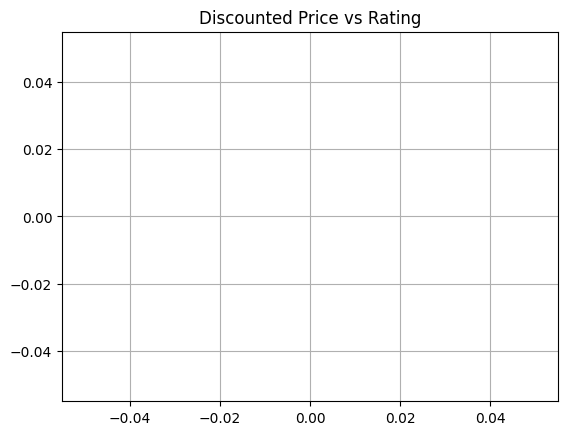

In [25]:
#Q8. What is the correlation between discounted_price and rating?
# Convert columns to numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df_corr = df.dropna(subset=['discounted_price', 'rating'])

# Calculate and display correlation
correlation = df_corr['discounted_price'].corr(df_corr['rating'])
print("\nQ7: Correlation between discounted_price and rating:", correlation)

# Optional: Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_corr, x='discounted_price', y='rating', alpha=0.6)
plt.title("Discounted Price vs Rating")
plt.grid(True)
plt.show()



In [24]:
#Q9. What are the Top 5 categories based on the highest ratings?
# Convert 'rating' to numeric safely
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing or broken ratings
df_clean_rating = df.dropna(subset=['rating'])

# Now calculate the top 5 categories by average rating
top_categories_by_rating = df_clean_rating.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

print("\nTop 5 categories based on the highest average ratings:")
print(top_categories_by_rating)



Top 5 categories based on the highest average ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [21]:
#Q10. Identify any potential areas for improvement or optimization based on the data analysis
# Ensure numeric types for filtering in Q9
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Drop NaN for these filters
filtered_df = df.dropna(subset=['rating', 'actual_price'])

# Low-rated expensive products
low_rated_expensive = filtered_df[(filtered_df['rating'] < 3) & 
                                  (filtered_df['actual_price'] > filtered_df['actual_price'].quantile(0.75))]
print("Low-rated expensive products:")
print(low_rated_expensive[['product_name', 'category', 'rating', 'actual_price']].head())


Low-rated expensive products:
Empty DataFrame
Columns: [product_name, category, rating, actual_price]
Index: []


In [ ]:
EDA - 4 ( spotify Data)

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("spotify.csv")

In [60]:
#Q1.  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
def handle_missing_duplicates(df):

    print("\n1. Missing Values and Duplicates:")

    # Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())
    # Strategy: Drop rows with missing values (you might want to use a different strategy)
    df.dropna(inplace=True)
    print("\nMissing values after handling:")
    print(df.isnull().sum())

    # Duplicates
    print("\n\nDuplicate Rows:", df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    print("\nDuplicate Rows after handling:", df.duplicated().sum())

    return df

df = handle_missing_duplicates(df.copy())


1. Missing Values and Duplicates:

Missing Values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Missing values after handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


Duplicate Rows: 27

Duplicate Rows after handling: 0


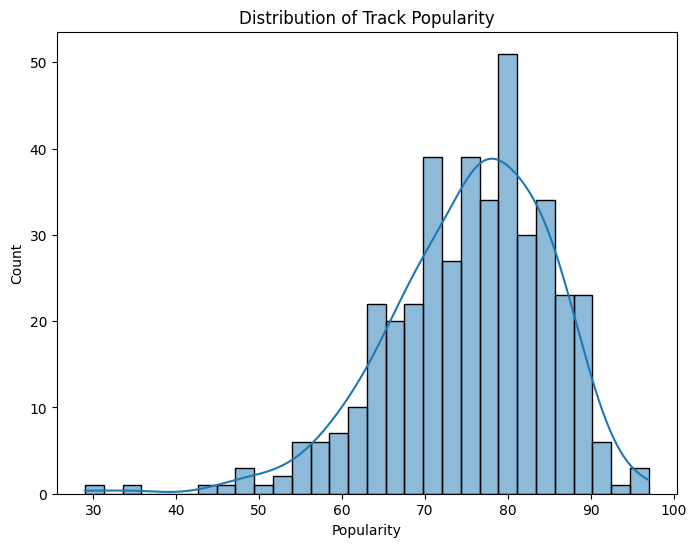

In [62]:
#Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
def visualize_popularity_distribution(df):

    if 'Popularity' not in df.columns:
        print("Error: 'Popularity' column not found.")
        return

    plt.figure(figsize=(8, 6))
    sns.histplot(df['Popularity'], bins=30, kde=True)
    plt.title("Distribution of Track Popularity")
    plt.xlabel("Popularity")
    plt.ylabel("Count")
    plt.show()

visualize_popularity_distribution(df.copy())

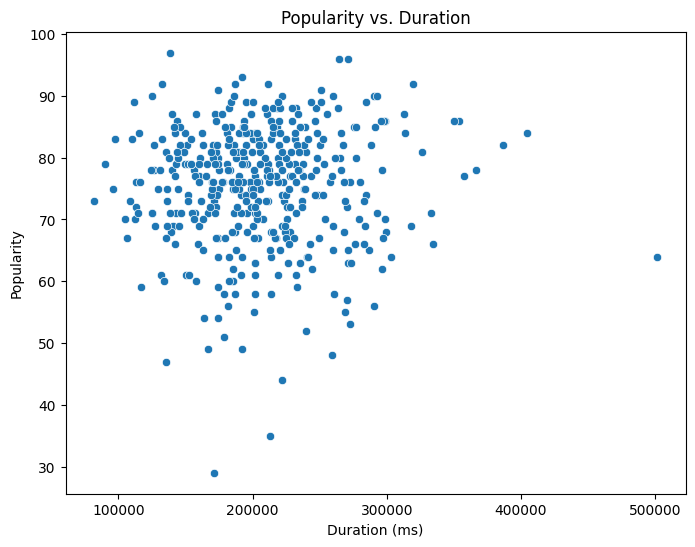

In [63]:
#Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
def visualize_popularity_vs_duration(df):

    if 'Popularity' not in df.columns or 'Duration (ms)' not in df.columns:
        print("Error: 'Popularity' or 'Duration (ms)' column not found.")
        return

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
    plt.title("Popularity vs. Duration")
    plt.xlabel("Duration (ms)")
    plt.ylabel("Popularity")
    plt.show()

visualize_popularity_vs_duration(df.copy())


Artist Track Counts:
 Drake           17
Eminem          11
Flo Rida        10
Ludacris        10
Timbaland       10
¥$              10
21 Savage       10
JAY-Z           10
Lil Nas X       10
Travis Scott     9
Name: Artist, dtype: int64


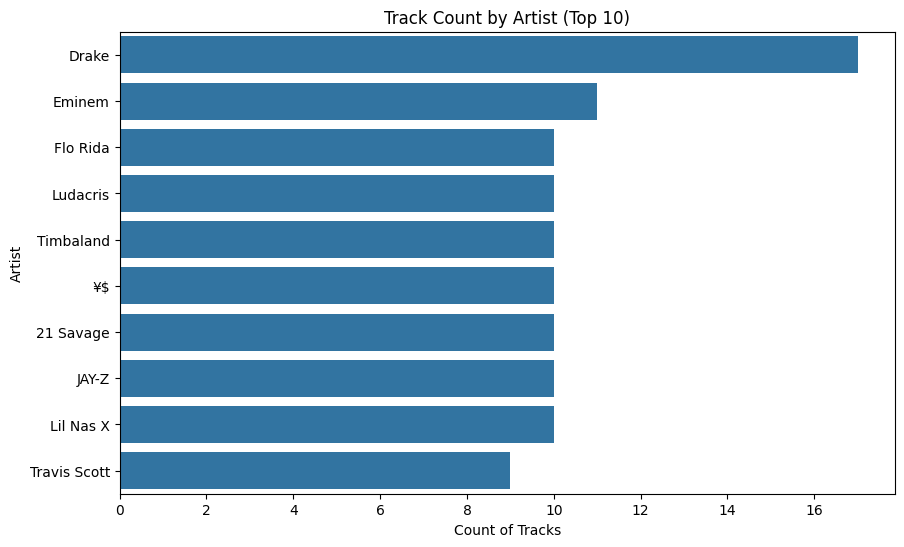

In [65]:
#Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
def artist_track_counts(df):

    if 'Artist' not in df.columns:
        print("Error: 'Artist' column not found.")
        return

    artist_counts = df['Artist'].value_counts().head(10)  # Top 10 for visualization

    print("\nArtist Track Counts:\n", artist_counts)

    plt.figure(figsize=(10, 6))
    sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index[:10])
    plt.title("Track Count by Artist (Top 10)")
    plt.xlabel("Count of Tracks")
    plt.ylabel("Artist")
    plt.show()

artist_track_counts(df.copy())


In [66]:
#Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
def least_popular_tracks(df, top_n=5):

    if 'Popularity' not in df.columns or 'Track Name' not in df.columns or 'Artist' not in df.columns:
        print("Error: 'Popularity', 'Track Name', or 'Artist' column not found.")
        return

    least_popular = df.nsmallest(top_n, 'Popularity')
    print(f"\n5. Top {top_n} Least Popular Tracks:")
    print(least_popular[['Artist', 'Track Name', 'Popularity']].to_markdown(index=False, numalign="left", stralign="left"))

least_popular_tracks(df.copy())


5. Top 5 Least Popular Tracks:


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.


6. Average Popularity of Top 5 Artists:
 Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


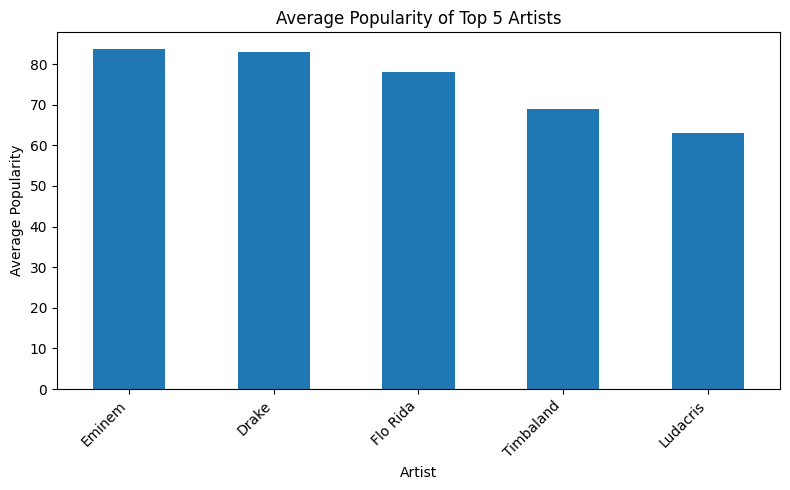

In [67]:
#Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
def avg_popularity_top_artists(df, top_n=5):

    if 'Popularity' not in df.columns or 'Artist' not in df.columns:
        print("Error: 'Popularity' or 'Artist' column not found.")
        return

    top_artists = df['Artist'].value_counts().head(top_n).index
    avg_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

    print(f"\n6. Average Popularity of Top {top_n} Artists:\n", avg_popularity)

    plt.figure(figsize=(8, 5))
    avg_popularity.plot(kind='bar')
    plt.title(f"Average Popularity of Top {top_n} Artists")
    plt.xlabel("Artist")
    plt.ylabel("Average Popularity")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

avg_popularity_top_artists(df.copy())

In [68]:
#Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
def most_popular_tracks_by_top_artists(df, top_n_artists=5, top_n_tracks=5):

    if 'Popularity' not in df.columns or 'Artist' not in df.columns or 'Track Name' not in df.columns:
        print("Error: 'Popularity', 'Artist', or 'Track Name' column not found.")
        return

    top_artists = df['Artist'].value_counts().head(top_n_artists).index
    for artist in top_artists:
        print(f"\n7. Top {top_n_tracks} Tracks for {artist}:")
        artist_df = df[df['Artist'] == artist].nlargest(top_n_tracks, 'Popularity')
        print(artist_df[['Track Name', 'Popularity']].to_markdown(index=False, numalign="left", stralign="left"))

most_popular_tracks_by_top_artists(df.copy())



7. Top 5 Tracks for Drake:


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

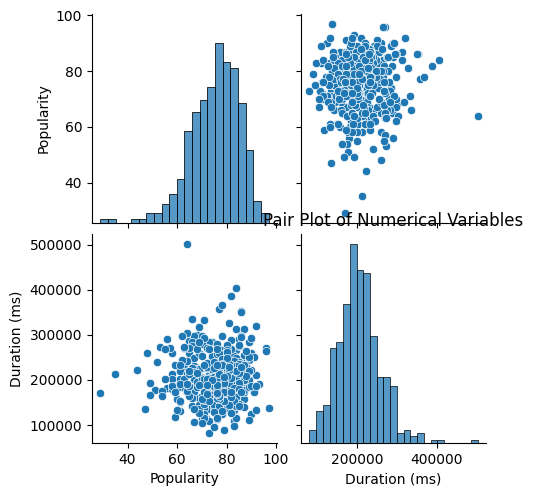

In [69]:
#Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
def visualize_pair_plot(df):

    numerical_df = df.select_dtypes(include=np.number)
    if numerical_df.shape[1] > 1:  # Check if there are at least 2 numerical columns
        sns.pairplot(numerical_df)
        plt.title("Pair Plot of Numerical Variables")
        plt.show()
    else:
        print("Warning: Less than 2 numerical columns found. Pair plot not generated.")

visualize_pair_plot(df.copy())


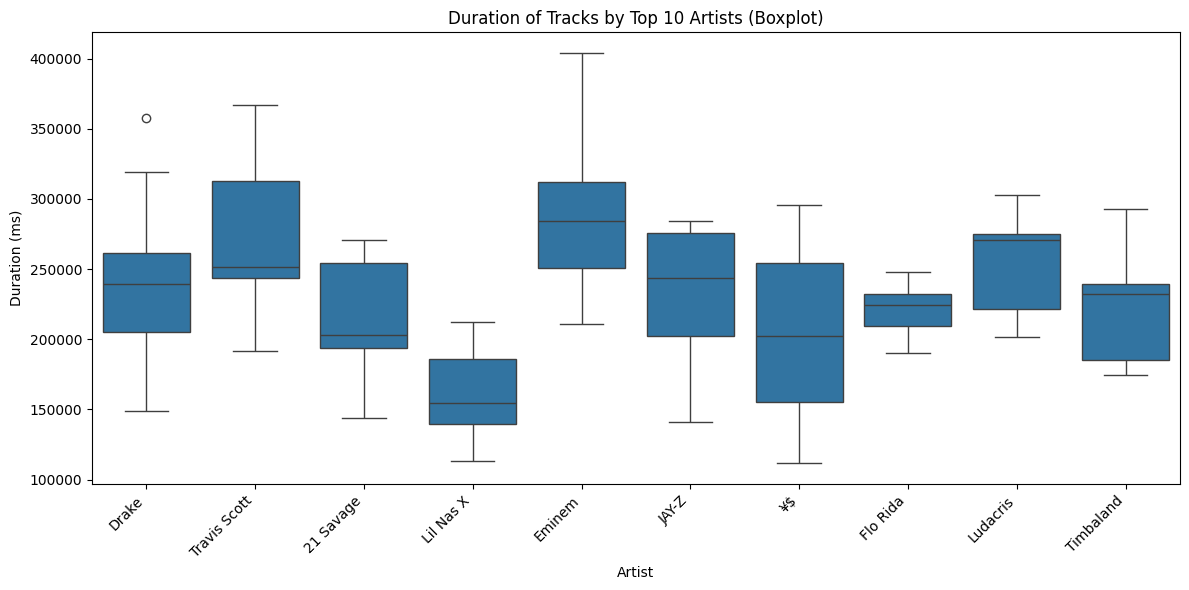

In [70]:
#Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
def visualize_duration_by_artist(df, plot_type='boxplot', top_n=10):

    if 'Artist' not in df.columns or 'Duration (ms)' not in df.columns:
        print("Error: 'Artist' or 'Duration (ms)' column not found.")
        return

    top_artists = df['Artist'].value_counts().head(top_n).index
    data = df[df['Artist'].isin(top_artists)]

    plt.figure(figsize=(12, 6))
    if plot_type == 'boxplot':
        sns.boxplot(x='Artist', y='Duration (ms)', data=data)
        plt.title(f"Duration of Tracks by Top {top_n} Artists (Boxplot)")
    elif plot_type == 'violinplot':
        sns.violinplot(x='Artist', y='Duration (ms)', data=data)
        plt.title(f"Duration of Tracks by Top {top_n} Artists (Violinplot)")
    else:
        print("Invalid plot_type. Choose 'boxplot' or 'violinplot'.")
        return
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Artist")
    plt.ylabel("Duration (ms)")
    plt.tight_layout()
    plt.show()

visualize_duration_by_artist(df.copy(), plot_type='boxplot')

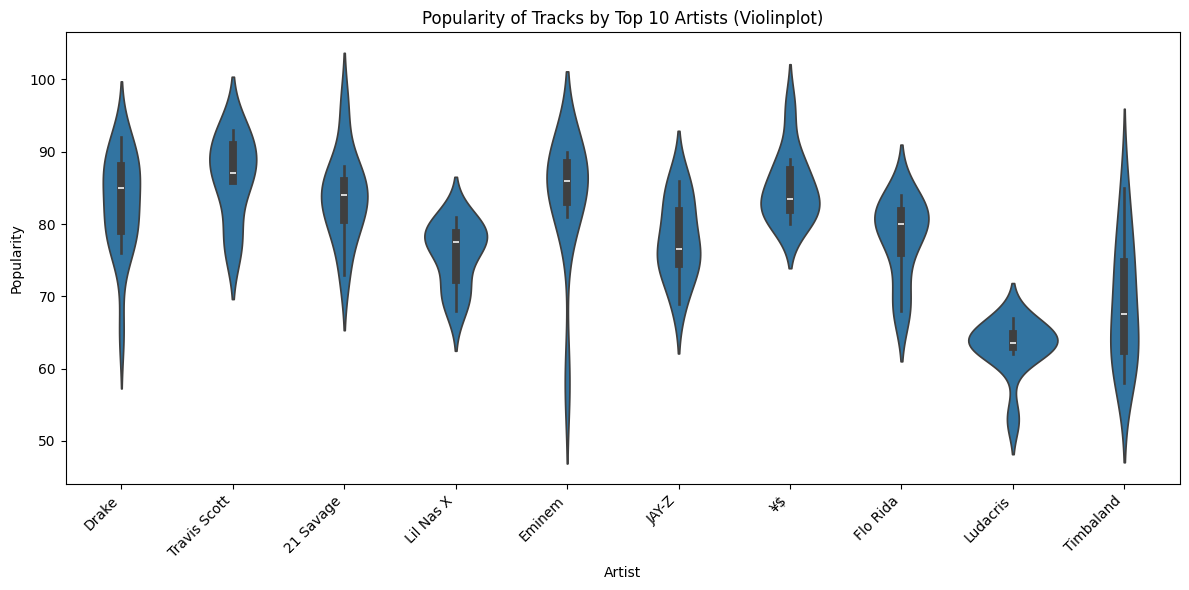

In [71]:
#Q10.  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
def visualize_popularity_by_artist(df, plot_type='violinplot', top_n=10):

    if 'Artist' not in df.columns or 'Popularity' not in df.columns:
        print("Error: 'Artist' or 'Popularity' column not found.")
        return

    top_artists = df['Artist'].value_counts().head(top_n).index
    data = df[df['Artist'].isin(top_artists)]

    plt.figure(figsize=(12, 6))
    if plot_type == 'swarmplot':
        sns.swarmplot(x='Artist', y='Popularity', data=data)
        plt.title(f"Popularity of Tracks by Top {top_n} Artists (Swarmplot)")
    elif plot_type == 'violinplot':
        sns.violinplot(x='Artist', y='Popularity', data=data)
        plt.title(f"Popularity of Tracks by Top {top_n} Artists (Violinplot)")
    else:
        print("Invalid plot_type. Choose 'swarmplot' or 'violinplot'.")
        return
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Artist")
    plt.ylabel("Popularity")
    plt.tight_layout()
    plt.show()

visualize_popularity_by_artist(df.copy(), plot_type='violinplot')